# 🧪 Prácticas por Dataset de Kaggle

## 🛍️ Retail Sales Dataset

🔗 Dataset disponible en: [https://www.kaggle.com/datasets/mohammadtalib786/retail-sales-dataset?utm_source=chatgpt.com](https://www.kaggle.com/datasets/mohammadtalib786/retail-sales-dataset?utm_source=chatgpt.com)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

**Pregunta:** ¿Cuántas filas y columnas tiene el dataset?

In [39]:
# Tu código aquí
df = pd.read_csv('../Datasets/retail_sales_dataset.csv')
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [7]:
# El número de filas
df.shape[0]

1000

In [8]:
# El número de columnas
df.shape[1]

9

**Pregunta:** ¿Cuáles son los tipos de datos de cada columna?

In [12]:
# Tu código aquí
df.dtypes

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

**Pregunta:** ¿Qué productos tienen mayores ventas en cantidad?

In [52]:
# Tu código aquí

num_categorias = df['Product Category'].nunique()

print(f"Número de categorías: {num_categorias}")

Número de categorías: 3


In [65]:
df.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False)

Product Category
Clothing       894
Electronics    849
Beauty         771
Name: Quantity, dtype: int64

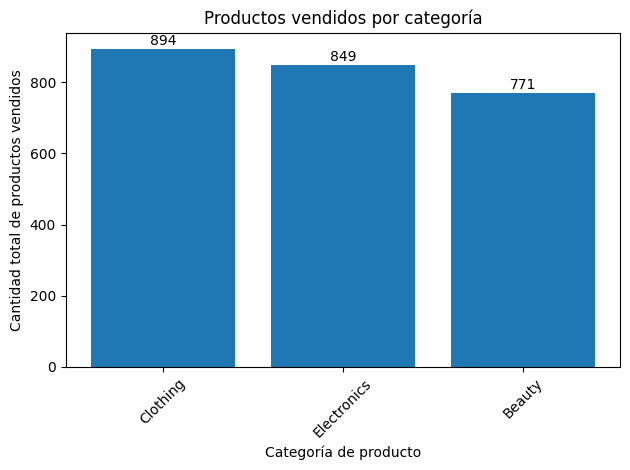

In [ ]:
import matplotlib.pyplot as plt

# Agrupar por categoría de producto y sumar la cantidad
ventas_por_categoria = df.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False)

plt.bar(ventas_por_categoria.index, ventas_por_categoria.values)

plt.xlabel("Categoría de producto")
plt.ylabel("Cantidad total de productos vendidos")
plt.title("Productos vendidos por categoría")
plt.xticks(rotation=45)

for i, valor in enumerate(ventas_por_categoria.values):
    plt.text(i, valor + 1, str(valor), ha='center', va='bottom')

# Ajustar diseño
plt.tight_layout()
plt.show()


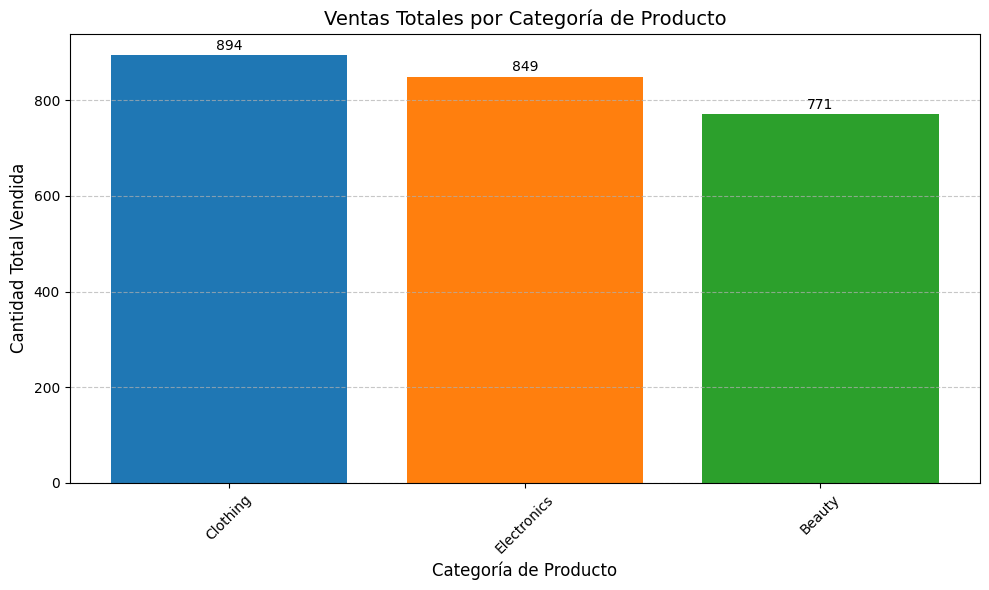

  Product Category  Quantity
1         Clothing       894
2      Electronics       849
0           Beauty       771


In [40]:
# 1. Agrupar por categoría de producto y sumar las cantidades
ventas_por_categoria = df.groupby('Product Category')['Quantity'].sum().reset_index()

# 2. Ordenar de mayor a menor cantidad
ventas_ordenadas = ventas_por_categoria.sort_values(by='Quantity', ascending=False)

# 3. Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(ventas_ordenadas['Product Category'], 
        ventas_ordenadas['Quantity'], 
        color=['#1f77b4', '#ff7f0e', '#2ca02c'])

# Personalizar el gráfico
plt.title('Ventas Totales por Categoría de Producto', fontsize=14)
plt.xlabel('Categoría de Producto', fontsize=12)
plt.ylabel('Cantidad Total Vendida', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar valores en las barras
for i, value in enumerate(ventas_ordenadas['Quantity']):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Mostrar tabla ordenada
print(ventas_ordenadas)

**Pregunta:** ¿Qué tiendas venden más productos?

In [66]:
# Tu código aquí
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [ ]:
import numpy as np

tiendas = ['Tienda A', 'Tienda B', 'Tienda C']

# Crear una nueva columna con una tienda asignada aleatoriamente a cada fila
df['Tienda'] = np.random.choice(tiendas, size=len(df))

df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Tienda
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Tienda C
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Tienda A
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Tienda A
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,Tienda C
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,Tienda B


In [69]:
df.groupby('Tienda')['Quantity'].sum().sort_values(ascending=False)

Tienda
Tienda B    867
Tienda A    854
Tienda C    793
Name: Quantity, dtype: int64

**Pregunta:** ¿Existen datos faltantes o duplicados?

In [87]:
# Tu código aquí
retail_limpieza = df.copy()

In [88]:
retail_limpieza.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [89]:
retail_limpieza.duplicated().sum()

np.int64(0)

In [90]:
retail_limpieza[retail_limpieza.duplicated()]

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Tienda,Ingreso_Total


In [91]:
retail_limpieza = retail_limpieza.drop_duplicates()

In [92]:
retail_limpieza

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Tienda,Ingreso_Total
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Tienda C,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Tienda A,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Tienda A,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,Tienda C,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,Tienda B,100
...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,Tienda A,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,Tienda C,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,Tienda C,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,Tienda A,150


**Pregunta:** ¿Cuál es el ingreso total por tienda?

In [71]:
# Tu código aquí
df.groupby('Tienda')['Total Amount'].sum().sort_values(ascending=False)

Tienda
Tienda B    166075
Tienda A    150530
Tienda C    139395
Name: Total Amount, dtype: int64

**Pregunta:** Agrupa las ventas por tipo de producto y encuentra la media de precios.

In [74]:
# Tu código aquí
df.groupby('Product Category')['Price per Unit'].mean()

Product Category
Beauty         184.055375
Clothing       174.287749
Electronics    181.900585
Name: Price per Unit, dtype: float64

**Pregunta:** Crea una nueva columna llamada ``ingreso_total`` que sea precio * cantidad.

In [77]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Tienda
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Tienda C
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Tienda A
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Tienda A
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,Tienda C
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,Tienda B


In [82]:
# Tu código aquí
df['Ingreso_Total'] = df['Quantity']* df['Price per Unit']

print(df['Ingreso_Total'])
df.head()


0       150
1      1000
2        30
3       500
4       100
       ... 
995      50
996      90
997     100
998     150
999     120
Name: Ingreso_Total, Length: 1000, dtype: int64


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Tienda,Ingreso_Total
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Tienda C,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Tienda A,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Tienda A,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,Tienda C,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,Tienda B,100


**Pregunta:** Usa una tabla dinámica para comparar ingresos por tienda y por producto.

Product Category  Beauty  Clothing  Electronics
Tienda                                         
Tienda A           50775     56230        43525
Tienda B           44455     55270        66350
Tienda C           48285     44080        47030


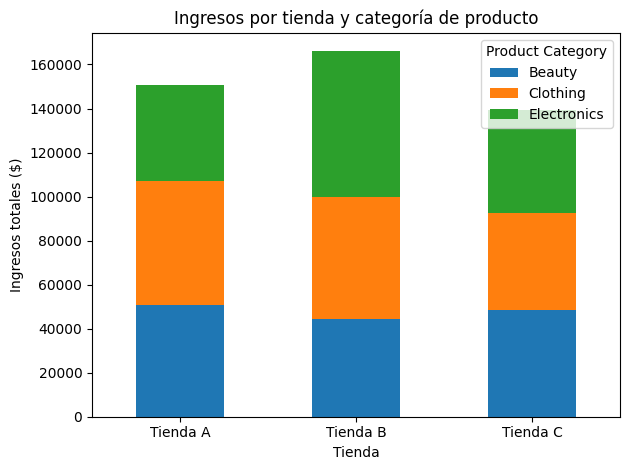

In [85]:
# Tu código aquí
# Crear tabla dinámica: ingresos por tienda y producto
pivot_table = df.pivot_table(
    values='Total Amount',            # Qué se va a calcular (los ingresos)
    index='Tienda',                   # Filas: las tiendas
    columns='Product Category',       # Columnas: categorías de productos
    aggfunc='sum',                    # Cómo agregamos: suma total
    fill_value=0                      # Rellenar con 0 si no hay ventas
)

# Mostrar la tabla
print(pivot_table)

pivot_table.plot(kind='bar', stacked=True)
plt.title("Ingresos por tienda y categoría de producto")
plt.xlabel("Tienda")
plt.ylabel("Ingresos totales ($)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## 📈 Dummy Advertising and Sales Data

🔗 Dataset disponible en: [https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data?utm_source=chatgpt.com](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data?utm_source=chatgpt.com)

**Pregunta:** ¿Cuál es el gasto promedio en publicidad por canal (TV, Radio, Periódico)?

In [15]:
import pandas as pd
import numpy as np

In [4]:
# Tu código aquí
dm = pd.read_csv('../Datasets/Dummy Data HSS.csv')
dm

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


In [14]:
print(dm[['TV', 'Radio', 'Social Media']].mean())

TV              54.066857
Radio           18.160356
Social Media     3.323956
dtype: float64


**Pregunta:** ¿Existe correlación entre el presupuesto publicitario y las ventas?

In [17]:
# Tu código aquí
dm.corr(numeric_only=True)['Sales']

TV              0.999497
Radio           0.869105
Social Media    0.528906
Sales           1.000000
Name: Sales, dtype: float64

**Pregunta:** ¿Qué campañas tienen ventas superiores a la media?

In [19]:
# Tu código aquí
media_ventas = dm['Sales'].mean()
print(dm[dm['Sales'] > media_ventas])

        TV      Radio  Social Media Influencer       Sales
3     83.0  30.020028      6.922304       Mega  298.246340
6     55.0  24.893811      4.273602      Micro  198.679825
8     76.0  24.648898      7.130116      Macro  270.189400
10    62.0  24.345189      5.151483       Nano  224.961019
12    64.0  20.240424      3.921148      Micro  229.632381
...    ...        ...           ...        ...         ...
4561  60.0  21.841864      5.092528      Macro  210.680016
4563  93.0  25.285149      2.805840      Macro  327.466288
4564  99.0  36.024174      4.288755      Macro  355.807121
4568  71.0  20.610685      6.545573       Nano  249.101915
4570  71.0  17.534640      1.940873      Macro  253.610411

[2239 rows x 5 columns]


**Pregunta:** Filtra las campañas con publicidad en TV > 200 y Radio > 20.

In [22]:
# Tu código aquí
dm[(dm['TV'] > 200) & (dm['Radio'] > 20)]

,TV,Radio,Social Media,Influencer,Sales


**Pregunta:** Agrupa por canal publicitario y calcula la media de ventas.

In [23]:
# Tu código aquí
dm.groupby('Influencer')['Sales'].mean()

Influencer
Macro    195.613601
Mega     190.593666
Micro    191.809095
Nano     191.934304
Name: Sales, dtype: float64

**Pregunta:** Crea una columna de ROI estimado usando una fórmula simple.

In [24]:
# Tu código aquí
dm['Gasto Total'] = dm['TV'] + dm['Radio'] + dm['Social Media']
dm['ROI'] = (dm['Sales'] - dm['Gasto Total']) / dm['Gasto Total']
print(dm[['TV', 'Radio', 'Social Media', 'Sales', 'Gasto Total', 'ROI']])

        TV      Radio  Social Media       Sales  Gasto Total       ROI
0     16.0   6.566231      2.907983   54.732757    25.474214  1.148555
1     13.0   9.237765      2.409567   46.677897    24.647332  0.893832
2     41.0  15.886446      2.913410  150.177829    59.799856  1.511341
3     83.0  30.020028      6.922304  298.246340   119.942332  1.486581
4     15.0   8.437408      1.405998   56.594181    24.843406  1.278036
...    ...        ...           ...         ...          ...       ...
4567  26.0   4.472360      0.717090   94.685866    31.189450  2.035830
4568  71.0  20.610685      6.545573  249.101915    98.156259  1.537810
4569  44.0  19.800072      5.096192  163.631457    68.896264  1.375041
4570  71.0  17.534640      1.940873  253.610411    90.475514  1.803083
4571  42.0  15.966688      5.046548  148.202414    63.013235  1.351925

[4572 rows x 6 columns]


**Pregunta:** Realiza una pivot_table para ver ventas promedio por cada tipo de canal.

In [5]:
# Tu código aquí
pivot_table = pd.pivot_table(dm,values='Sales',index='Influencer',aggfunc='mean')
print(pivot_table)

                 Sales
Influencer            
Macro       195.613601
Mega        190.593666
Micro       191.809095
Nano        191.934304


## 🎬 The Movies Dataset

🔗 Dataset disponible en: [https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset?utm_source=chatgpt.com](https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset?utm_source=chatgpt.com)

**Pregunta:** ¿Cuáles son las películas con mayor presupuesto?

In [22]:
df_movies = pd.read_csv('../DataSets/MovieFranchises.csv')

In [23]:
df_movies.head()

,index,MovieID,Title,Lifetime Gross,Year,Studio,Rating,Runtime,Budget,ReleaseDate,VoteAvg,VoteCount,FranchiseID
0,0,1001,Star Wars: Episode IV - A New Hope,775398007,1977,Lucasfilm,PG,121.0,11000000.0,05-25-77,4.09,96233.0,101.0
1,1,1002,Star Wars: Episode V - The Empire Strikes Back,538375067,1980,Lucasfilm,PG,124.0,18000000.0,06-20-80,4.12,79231.0,101.0
2,2,1003,Star Wars: Episode VI - Return of the Jedi,475106177,1983,Lucasfilm,PG,135.0,32500000.0,05-25-83,3.98,76082.0,101.0
3,3,1004,Jurassic Park,1109802321,1993,Universal Pictures,PG-13,127.0,63000000.0,06-11-93,3.69,82700.0,102.0
4,4,1005,The Lost World: Jurassic Park,618638999,1997,Universal Pictures,PG-13,129.0,73000000.0,05-23-97,3.01,19721.0,102.0


In [24]:
peliculas_mayor_presupuesto = df_movies.sort_values(by='Budget', ascending=False)
print(peliculas_mayor_presupuesto[['Title', 'Budget']].head())

                                         Title       Budget
50                           Avengers: Endgame  400000000.0
43     Star Wars: Episode VIII - The Last Jedi  317000000.0
36  Star Wars: Episode VII - The Force Awakens  306000000.0
45                      Avengers: Infinity War  300000000.0
33                     Avengers: Age of Ultron  280000000.0


**Pregunta:** ¿Qué películas obtuvieron mayor ganancia (ingresos - presupuesto)?

In [25]:
# Tu código aquí

df_movies['Lifetime Gross'] = pd.to_numeric(df_movies['Lifetime Gross'], errors='coerce')
df_movies['Ganancia'] = df_movies['Lifetime Gross'] - df_movies['Budget']
peliculas_mayor_ganancia = df_movies.sort_values(by='Ganancia', ascending=False)
print(peliculas_mayor_ganancia[['Title', 'Ganancia']].head())

                                         Title      Ganancia
50                           Avengers: Endgame  2.397501e+09
36  Star Wars: Episode VII - The Force Awakens  1.763522e+09
45                      Avengers: Infinity War  1.748360e+09
56                     Spider-Man: No Way Home  1.715878e+09
34                              Jurassic World  1.521537e+09


**Pregunta:** ¿Cuántas películas hay por género?

In [26]:
# Tu código aquí
# NO HAY COLUMNA DE GENERO
generos = ["Accion", "Comedia", "Drama", "Ciencia Ficcion", "Aventura", "Animacion"]
np.random.seed(42)  
df_movies["Genero"] = np.random.choice(generos, size=len(df_movies))

peliculas_por_genero = df_movies['Genero'].value_counts()
print(peliculas_por_genero)

NameError: name 'np' is not defined

**Pregunta:** ¿Existen películas con presupuesto o ingresos nulos?

In [27]:
# Tu código aquí
peliculas_presupuesto_ingresos_nulos = df_movies[(df_movies['Budget'] == 0) | (df_movies['Lifetime Gross'] == 0)]
print(peliculas_presupuesto_ingresos_nulos[['Title', 'Budget', 'Lifetime Gross']])

Empty DataFrame
Columns: [Title, Budget, Lifetime Gross]
Index: []


**Pregunta:** Crea una nueva columna de rentabilidad (ganancia/presupuesto).

In [28]:
# Tu código aquí
df_movies['Rentabilidad'] = df_movies['Ganancia'] / df_movies['Budget']
print(df_movies[['Title', 'Ganancia', 'Budget', 'Rentabilidad']].head())

                                            Title      Ganancia      Budget  \
0              Star Wars: Episode IV - A New Hope  7.643980e+08  11000000.0   
1  Star Wars: Episode V - The Empire Strikes Back  5.203751e+08  18000000.0   
2      Star Wars: Episode VI - Return of the Jedi  4.426062e+08  32500000.0   
3                                   Jurassic Park  1.046802e+09  63000000.0   
4                   The Lost World: Jurassic Park  5.456390e+08  73000000.0   

   Rentabilidad  
0     69.490728  
1     28.909726  
2     13.618652  
3     16.615910  
4      7.474507  


**Pregunta:** Agrupa por año de lanzamiento y calcula ingresos promedio.

In [29]:
# Tu código aquí
ingresos_promedio_por_anio = df_movies.groupby('Year')['Lifetime Gross'].mean()
print(ingresos_promedio_por_anio)

Year
1977                7.753980e+08
1980                5.383751e+08
1983                4.751062e+08
1993                1.109802e+09
1997                6.186390e+08
1999                1.027083e+09
2001                7.630552e+08
2002                8.272016e+08
2003                1.146436e+09
2004                7.976608e+08
2005                8.825604e+08
2007                9.422017e+08
2008                4.252836e+08
2009                9.344830e+08
2010                8.005019e+08
2011                7.207521e+08
2012                1.267923e+09
2013                9.395408e+08
2014                8.166577e+08
2015                1.415795e+09
2016                9.632719e+08
2017                9.826514e+08
2018                1.144405e+09
2019                1.533010e+09
2021                7.824844e+08
2022                9.040731e+08
Creator                      NaN
George Lucas        1.977000e+03
J. K. Rowling       2.001000e+03
J. R. R. Tolkien    2.001000e+03
Micha

**Pregunta:** Realiza una tabla dinámica que compare ingresos por género y año.

In [31]:
# Tu código aquí

# No hay tabla de genero xd

## 🌦️ Climate Insights Dataset

🔗 Dataset disponible en: [https://www.kaggle.com/datasets/goyaladi/climate-insights-dataset?utm_source=chatgpt.com](https://www.kaggle.com/datasets/goyaladi/climate-insights-dataset?utm_source=chatgpt.com)

**Pregunta:** ¿Cuántos registros hay por año?

In [10]:
# Tu código aquí
df_climate = pd.read_csv('../DataSets/climate_change_data.csv')

In [11]:
# Tu código aquí
df_climate.head()

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164


In [12]:
# Tu código aquí
df_climate['Date'] = pd.to_datetime(df_climate['Date'])

In [13]:
# Tu código aquí
print(df_climate['Date'].dt.year.value_counts())

Date
2000    436
2016    436
2012    436
2020    436
2005    435
2001    435
2003    435
2015    435
2018    435
2004    435
2007    435
2011    435
2008    435
2009    435
2002    434
2006    434
2014    434
2010    434
2013    434
2017    434
2019    434
2021    434
2022    434
Name: count, dtype: int64


**Pregunta:** ¿Cuál es la temperatura media mensual más alta y más baja?

In [14]:
# Tu código aquí
temp_mensual = df_climate.groupby(df_climate['Date'].dt.month)['Temperature'].mean()
print("Mes con temperatura más alta:", temp_mensual.idxmax(), temp_mensual.max())
print("Mes con temperatura más baja:", temp_mensual.idxmin(), temp_mensual.min())

Mes con temperatura más alta: 11 15.290563089539303
Mes con temperatura más baja: 4 14.745375328695793


**Pregunta:** ¿Qué meses tienen mayor precipitación?

In [16]:
print(df_climate.groupby(df_climate['Date'].dt.month)['Precipitation'].mean().sort_values(ascending=False))

Date
9     50.947790
5     50.818566
3     50.494378
10    50.241029
4     50.131147
6     50.130129
12    50.059991
11    49.900964
2     49.550014
1     49.380073
7     48.663987
8     48.276644
Name: Precipitation, dtype: float64


**Pregunta:** ¿Existen valores faltantes en alguna columna?

In [17]:
print(df_climate.isna().sum())

Date              0
Location          0
Country           0
Temperature       0
CO2 Emissions     0
Sea Level Rise    0
Precipitation     0
Humidity          0
Wind Speed        0
dtype: int64


**Pregunta:** Agrupa por estación del año y calcula la media de temperatura.

In [18]:
estaciones_lista = ['Invierno', 'Invierno', 'Primavera', 'Primavera', 'Primavera','Verano', 'Verano', 'Verano','Otoño', 'Otoño', 'Otoño','Invierno']
df_climate.groupby(df_climate['Date'].dt.month.map(lambda m: estaciones_lista[m-1]))['Temperature'].mean()

Date
Invierno     14.957014
Otoño        15.003823
Primavera    14.809827
Verano       14.974683
Name: Temperature, dtype: float64

**Pregunta:** Crea una columna que clasifique los días como 'calurosos' o 'templados'.

In [19]:
df_climate['Clasificacion'] = df_climate['Temperature'].apply(lambda x: 'Caluroso' if x > 25 else 'Templado')

**Pregunta:** Genera una pivot_table que muestre la temperatura promedio por año y mes.

In [20]:
# Tu código aquí
pivot_temp = pd.pivot_table(df_climate,values='Temperature',index=df_climate['Date'].dt.year,columns=df_climate['Date'].dt.month,aggfunc='mean')
print(pivot_temp)

Date         1          2          3          4          5          6   \
Date                                                                     
2000  14.206357  13.932424  16.353462  14.956865  15.447593  15.312805   
2001  14.708201  16.514600  13.973159  15.036136  14.800959  14.723588   
2002  13.620897  14.760417  14.212325  13.850515  13.673576  13.502537   
2003  14.885562  16.854469  14.114849  14.987196  14.129527  14.842865   
2004  15.914895  13.717340  14.815031  15.814182  15.283723  15.279225   
2005  15.310610  14.956032  16.763042  14.461071  16.430089  15.204628   
2006  13.021321  14.050059  16.181762  14.232334  15.479402  16.405412   
2007  14.419660  14.287890  14.973328  13.083154  15.425498  16.270065   
2008  15.947948  15.317924  14.456524  14.146105  15.636002  15.028988   
2009  15.004275  13.500589  14.986215  13.581644  13.945644  14.644463   
2010  16.430713  16.602293  13.796567  14.304352  14.307113  14.671207   
2011  14.799867  13.479437  15.693903 